In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#to remove unwanted column from dataset
df.drop('Cabin',axis=1,inplace=True)

In [6]:
#to remove unwanted column from dataset
df.drop('Embarked',axis=1,inplace=True)

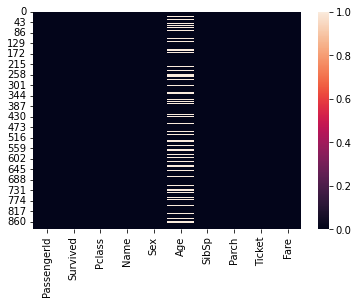

In [7]:
#visualization of null values
sns.heatmap(df.isnull())
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [9]:
#find the percentage of the nul values of each column in given dataset
df.isnull().sum()/df.shape[0]*100

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Fare            0.00000
dtype: float64

In [10]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
#fill the null values of Age column with mean of rating permanently
#1st find the mean
m=df['Age'].mean()
df['Age'].fillna(m,inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [12]:
#to convert datatype of Age column from float to int permanently
df['Age']=df['Age'].astype('int')

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
dtype: object

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
#Seperate Dataset df into 2 parts: 1. df_cat and df_num
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(['float', 'int'])

#if we have both float and int the:
#df_num=df.select_dtypes(['float', 'int'])

In [17]:
#apply label encoder on df_cat
from sklearn.preprocessing import LabelEncoder
column=df_cat.columns
for col in column:
    #create object of label encoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Column Name: PassengerId and skewness : 0.0


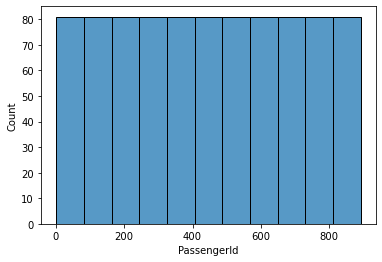

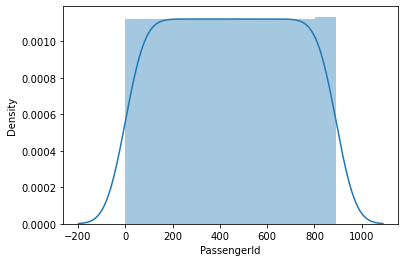

Column Name: Survived and skewness : 0.4785234382949897


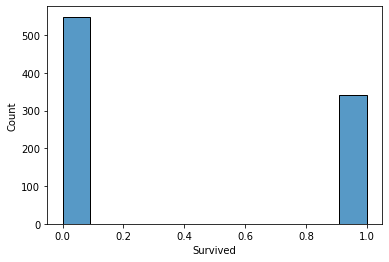

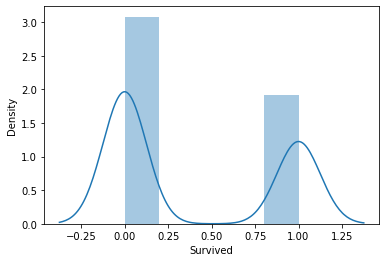

Column Name: Pclass and skewness : -0.6305479068752845


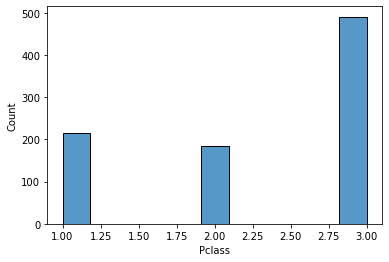

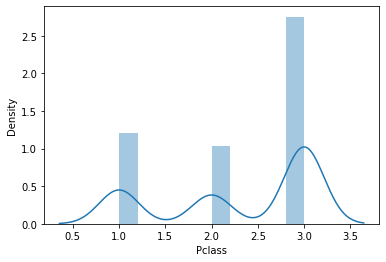

Column Name: Age and skewness : 0.45956263424701577


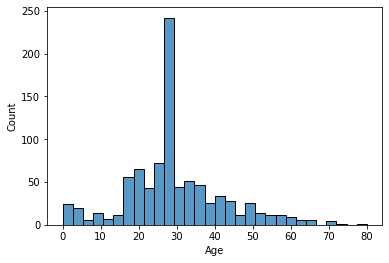

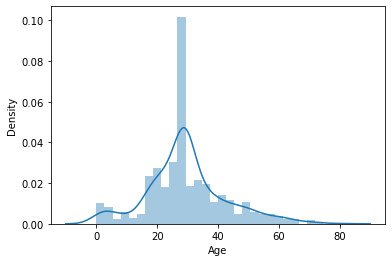

Column Name: SibSp and skewness : 3.6953517271630565


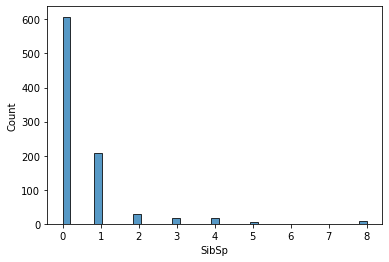

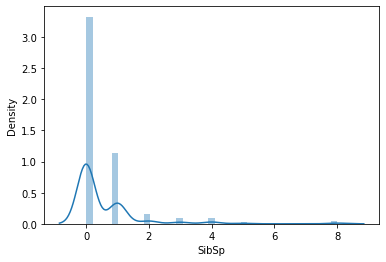

Column Name: Parch and skewness : 2.7491170471010933


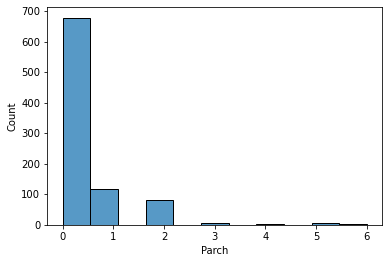

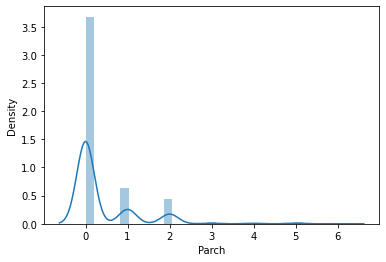

Column Name: Fare and skewness : 4.787316519674893


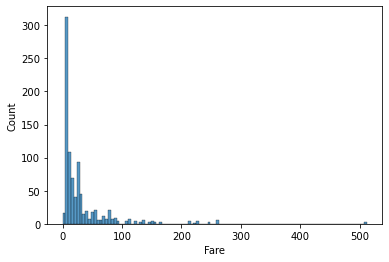

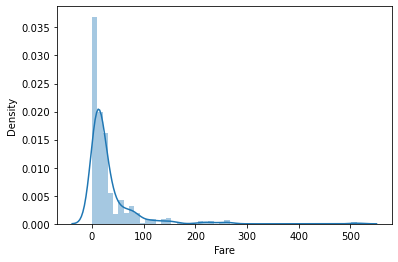

In [18]:
#to handle skewness on numeric columns
columns=df_num.columns
print(columns)
for col in columns:
    s=df_num[col].skew()
    print('Column Name: {} and skewness : {}'.format(col,s))
    sns.histplot(df_num[col])
    plt.show()
    sns.distplot(df_num[col])
    plt.show()

In [19]:
#concat of df_num and df_cat and hold in new dataframe df_new
df_new= pd.concat([df_num, df_cat], axis=1)
df_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket
0,1,0,3,22,1,0,7.2500,108,1,523
1,2,1,1,38,1,0,71.2833,190,0,596
2,3,1,3,26,0,0,7.9250,353,0,669
3,4,1,1,35,1,0,53.1000,272,0,49
4,5,0,3,35,0,0,8.0500,15,1,472


In [20]:
df_new['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

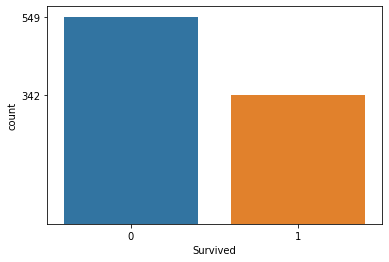

In [21]:
# Visualize
sns.countplot(data=df_new,x='Survived')
f=df_new['Survived'].value_counts()
plt.yticks(f)
plt.show()

In [22]:
#Data is unbalanced so we will apply Sampling techniques to balance it
#We will be using RandomOverSampler

from imblearn.over_sampling import RandomOverSampler

In [23]:
#First select input and output

#select input and output
X=df_new.drop('Survived', axis=1)
Y=df_new['Survived']


In [24]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=1)

In [25]:
#Apply scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [26]:
#to convert minority class (1) into majority class (0)
ros= RandomOverSampler(random_state=1)

In [27]:
#apply over sampler on training data
X_train_ros, Y_train_ros=ros.fit_resample(X_train, Y_train)

In [28]:
#apply over sampler on testing data
X_test_ros, Y_test_ros=ros.fit_resample(X_test, Y_test)

In [29]:
X_train.shape , X_test.shape, Y_train.shape, Y_test.shape

((623, 9), (268, 9), (623,), (268,))

In [30]:
#Dataset is now balanced

In [31]:
#importing confusion matrix and classification report packages for reports to analyse after creation of model 
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
#create a function
def create_model(model):          #model user defined which holds the object of algo
    #train the model
    model.fit(X_train,Y_train)
    #test the model
    Y_pred=model.predict(X_test)
    #Generate report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [33]:
#apply ensembling technique: randomforesttree (bootstrapping method) with bagging
#call Random Forest Tree from package

from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc=RandomForestClassifier(n_estimators=10, max_features=8, random_state=1)
#here n_estimators means the no. of DTC, min: 10 and max:100
#by default gini index
"""
for i in range(10,1,-1):
    rfc=RandomForestClassifier(n_estimators=10, max_features=i, random_state=1)
    print('No. of features: ', i)
    #call function
    rfc=create_model(rfc)
"""

"\nfor i in range(10,1,-1):\n    rfc=RandomForestClassifier(n_estimators=10, max_features=i, random_state=1)\n    print('No. of features: ', i)\n    #call function\n    rfc=create_model(rfc)\n"

In [49]:
#We found that with the above for loop the best score we get is with max_features=8

rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       153
           1       0.82      0.62      0.70       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268

[[137  16]
 [ 44  71]]


In [54]:
#Now we will see results with entropy DTC

rfc1=RandomForestClassifier(n_estimators=10, max_features=3, random_state=1, criterion='entropy')
'''
for i in range(10,1,-1):
    rfc=RandomForestClassifier(n_estimators=10, max_features=i, random_state=1, criterion='entropy')
    print('No. of features: ', i)
    #call function
    rfc=create_model(rfc)
'''
#we checked with above loop and found best score is with 3 and 4 features

"\nfor i in range(10,1,-1):\n    rfc=RandomForestClassifier(n_estimators=10, max_features=i, random_state=1, criterion='entropy')\n    print('No. of features: ', i)\n    #call function\n    rfc=create_model(rfc)\n"

In [55]:
rfc1=create_model(rfc1)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       153
           1       0.87      0.64      0.74       115

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.79       268
weighted avg       0.82      0.81      0.80       268

[[142  11]
 [ 41  74]]


In [56]:
# Best method : randomForestTree(Entropy):Features:3(64%) & Features:4(62%)
#number of decision tree = 10

In [57]:
# Show all the information gain of all the features
d={'Input':X.columns,'IG':rfc.feature_importances_}
#convert to data frame 
f=pd.DataFrame(d)
f.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.301407
1,Name,0.143710
2,Ticket,0.134022
3,Age,0.120192
4,Fare,0.087554
5,PassengerId,0.084960
6,Pclass,0.081683
7,SibSp,0.036332
8,Parch,0.010140


In [58]:
#Use Boosting technique: It is an ensembling Technique

#1. ADA boosting: means Adaptor Boosting: It works on decision stump

from sklearn.ensemble import AdaBoostClassifier

In [61]:
ada=AdaBoostClassifier(n_estimators=9, random_state=1)
#n_estimators means no. of decision stumps can be <=100 
#we can see that we have 16 inputs
'''
for i in range(1,10):
    ada=AdaBoostClassifier(n_estimators=i, random_state=1)
    print('No. of decision stumps: ', i)
    ada=create_model(ada)
'''

"\nfor i in range(1,10):\n    ada=AdaBoostClassifier(n_estimators=i, random_state=1)\n    print('No. of decision stumps: ', i)\n    ada=create_model(ada)\n"

In [62]:
#from the above for loop we found that the best resut is found at n_estimator value of 9

In [63]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       153
           1       0.73      0.69      0.71       115

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

[[124  29]
 [ 36  79]]


In [64]:
#apply gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gbc=GradientBoostingClassifier(n_estimators=71 , random_state=1)
##n_estimator is min: 10 and max: 100 as GBC focuses on DT model structure
'''
for i in range(10,101,1):
    gbc=GradientBoostingClassifier(n_estimators=i, random_state=1)
    print('No. of estimators: ', i)
    gbc=create_model(gbc)
'''

"\nfor i in range(10,101,1):\n    gbc=GradientBoostingClassifier(n_estimators=i, random_state=1)\n    print('No. of estimators: ', i)\n    gbc=create_model(gbc)\n"

In [79]:
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       153
           1       0.81      0.63      0.71       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268

[[136  17]
 [ 43  72]]


In [66]:
#We are not able to find a definitive n_estimator value for this model

In [67]:
#Now we will use Extreme Gradient Boosting
from xgboost import XGBClassifier

In [73]:
xg=XGBClassifier(n_estimators=14,reg_alpha=1, random_state=1)
#automatic overfitting: reg means reularization and alpha or lambda is the hyperparameter
#n_estimator is min: 10 and max: 100 as GBC focuses on DT model structure

In [71]:
"""
for i in range(10,101):
    xg=XGBClassifier(n_estimators=i,reg_alpha=1, random_state=1)
    print('No. of estimators: ', i)
    xg=create_model(xg)
"""

"\nfor i in range(10,101):\n    xg=XGBClassifier(n_estimators=i,reg_alpha=1, random_state=1)\n    print('No. of estimators: ', i)\n    xg=create_model(xg)\n"

In [74]:
#Best score was found out at 14 n_estimator value

In [75]:
xg=create_model(xg)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       153
           1       0.84      0.67      0.74       115

    accuracy                           0.80       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.80      0.80       268

[[138  15]
 [ 38  77]]


In [76]:
#We can conclude that the model is underfit as we are not able to get a good score to finalize the model.
#We applied RandomForest and all Boosting Techniques but were unsuccessful in creating a good model.